In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pwscf import parse_qe_pwrelax_output, parse_qe_pwscf_output_mod, parse_set

In [2]:
area = 14.749203703502888
eng_0 = -1868.8506029235
BaO_sep_relax = np.array([0,1,2,3,4,5,6])
BaO_eng_relax_Ry = np.array([-1868.8506029235,-1868.8422916915,
                  -1868.7968241379,-1868.7892128134,
                  -1868.7859397456,-1868.7842131765,
                  -1868.7819223419])
BaO_eng_relax = (BaO_eng_relax_Ry - eng_0)*13.6/area
BaO_force_relax = np.insert(np.diff(BaO_eng_relax),0,0)

sep_scf = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7])
BaO_eng_scf_Ry = np.array([-1868.8506029235,-1868.83506338,
                        -1868.81501702, -1868.80051401,
                        -1868.79071372, -1868.78404091,
                        -1868.77938139, -1868.77600306,
                        -1868.77348144, -1868.77152935,
                        -1868.76998521, -1868.76873688,
                        -1868.76770168, -1868.76683202,
                        -1868.76608357])
BaO_eng_scf = (BaO_eng_scf_Ry - eng_0)*13.6/area
BaO_force_scf = np.insert(np.diff(BaO_eng_scf),0,0)

CuO_eng_scf_Ry = np.array([-1868.8506029235, -1868.80681669,
                          -1868.76360865, -1868.74116813,
                          -1868.73090883, -1868.72635353,
                          -1868.7242, -1868.72319855,
                          -1868.72260715, -1868.72223557,
                          -1868.72200139, -1868.72183115,
                          -1868.72171420, -1868.72162156,
                          -1868.72154483])
CuO_eng_scf = (CuO_eng_scf_Ry - eng_0)*13.6/area
CuO_force_scf = np.insert(np.diff(CuO_eng_scf),0,0)

Y_eng_scf_Ry = np.array([-1868.8506029235,-1868.78138813,
                        -1868.65960884, -1868.55110556,
                        -1868.47578889, -1868.43348212,
                        -1868.41189542, -1868.40074105,
                        -1868.39450530, -1868.39062319,
                        -1868.38796770, -1868.38602225,
                        -1868.38454026, -1868.38338326,
                        -1868.38245571])
Y_eng_scf = (Y_eng_scf_Ry - eng_0)*13.6/area
Y_force_scf = np.insert(np.diff(Y_eng_scf),0,0)


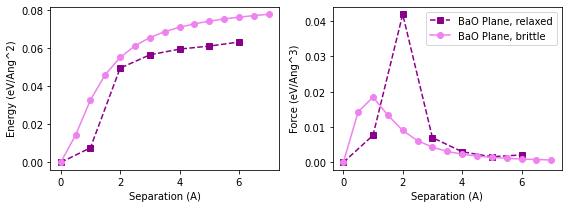

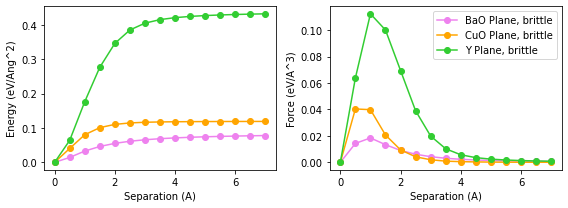

In [3]:
f, ax = plt.subplots(1,2,sharex=True, figsize = [8,3])
ax[0].plot(BaO_sep_relax, BaO_eng_relax, 's--',label = 'BaO Plane, relaxed', color = 'darkmagenta')
ax[0].plot(sep_scf, BaO_eng_scf, '-o',label = 'BaO Plane, brittle', color = 'violet')
ax[0].set_xlabel('Separation (A)')
ax[0].set_ylabel('Energy (eV/Ang^2)')
ax[1].plot(BaO_sep_relax, BaO_force_relax, 's--',label = 'BaO Plane, relaxed', color = 'darkmagenta')
ax[1].plot(sep_scf, BaO_force_scf, 'o-',label = 'BaO Plane, brittle', color = 'violet')
ax[1].set_ylabel('Force (eV/Ang^3)')
ax[1].set_xlabel('Separation (A)')
ax[1].legend()
f.tight_layout()
f.savefig('Undoped_brittleVrelax_BaO.png')

f2,ax2 = plt.subplots(1,2,sharex=True, figsize = [8,3])
ax2[0].plot(sep_scf, BaO_eng_scf, '-o',label = 'BaO Plane, brittle', color = 'violet')
ax2[0].plot(sep_scf, CuO_eng_scf, '-o',label = 'CuO Plane, brittle', color = 'orange')
ax2[0].plot(sep_scf, Y_eng_scf, '-o',label = 'Y Plane, brittle', color = 'limegreen')
ax2[0].set_ylabel('Energy (eV/Ang^2)')
ax2[0].set_xlabel('Separation (A)')
ax2[1].plot(sep_scf, BaO_force_scf, 'o-',label = 'BaO Plane, brittle', color = 'violet')
ax2[1].plot(sep_scf, CuO_force_scf, 'o-',label = 'CuO Plane, brittle', color = 'orange')
ax2[1].plot(sep_scf, Y_force_scf, 'o-',label = 'Y Plane, brittle', color = 'limegreen')
ax2[1].set_xlabel('Separation (A)')
ax2[1].set_ylabel('Force (eV/A^3)')
ax2[1].legend()
f2.tight_layout()
f2.savefig('Undoped_abs.png')

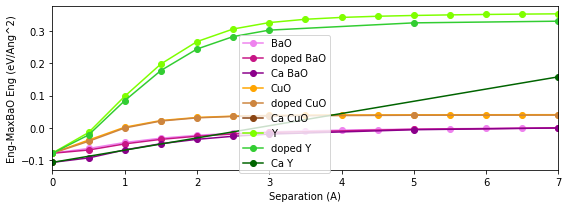

In [36]:
path = 'doped_cleave/'
deng_0 = -14924.92178127*13.605662285137
[dY_eng, dCuO_eng, dBaO_eng, dsep_Y, dsep_CuO, dsep_BaO] = parse_set(path, deng_0)
darea= 117.70632518141599

dBaO_eng = dBaO_eng/darea
dBaO_force = np.insert(np.diff(dBaO_eng),0,0)

dCuO_eng = dCuO_eng/darea
dCuO_force = np.insert(np.diff(dCuO_eng),0,0)


dY_eng = dY_eng/darea
dY_force = np.insert(np.diff(dY_eng),0,0)

path = 'Ca1/'
Ca_eng_0 = -1842.90350019*13.605662285137
[Ca_Y_eng, Ca_CuO_eng, Ca_BaO_eng, Ca_sep_Y, Ca_sep_CuO, Ca_sep_BaO] = parse_set(path, Ca_eng_0)
Ca_area= 3.930220125*3.722237662 

Ca_BaO_eng = Ca_BaO_eng/Ca_area
Ca_BaO_force = np.insert(np.diff(Ca_BaO_eng),0,0)

Ca_CuO_eng = Ca_CuO_eng/Ca_area
Ca_CuO_force = np.insert(np.diff(Ca_CuO_eng),0,0)


Ca_Y_eng = Ca_Y_eng/Ca_area
Ca_Y_force = np.insert(np.diff(Ca_Y_eng),0,0)

f3,ax3 = plt.subplots(1,1,sharex=True, figsize = [8,3])
ax3.set_ylabel('Eng-MaxBaO Eng (eV/Ang^2)')
ax3.set_xlabel('Separation (A)')
ax3.set_xlim([0,7])
ax3.plot(sep_scf, BaO_eng_scf-max(BaO_eng_scf), '-o',label = 'BaO', color = 'violet')
ax3.plot(dsep_BaO, dBaO_eng-max(dBaO_eng), '-o',label = 'doped BaO', color = 'mediumvioletred')
ax3.plot(Ca_sep_BaO, Ca_BaO_eng-max(Ca_BaO_eng), '-o',label = 'Ca BaO', color = 'darkmagenta')

ax3.plot(sep_scf, CuO_eng_scf-max(BaO_eng_scf), '-o',label = 'CuO', color = 'orange')
ax3.plot(dsep_CuO, dCuO_eng-max(dBaO_eng), '-o',label = 'doped CuO', color = 'peru')
ax3.plot(Ca_sep_CuO, Ca_CuO_eng-max(Ca_BaO_eng), '-o',label = 'Ca CuO', color = 'saddlebrown')

ax3.plot(sep_scf, Y_eng_scf-max(BaO_eng_scf), '-o',label = 'Y', color = 'chartreuse')
ax3.plot(dsep_Y, dY_eng-max(dBaO_eng), '-o',label = 'doped Y', color = 'limegreen')
ax3.plot(Ca_sep_Y, Ca_Y_eng-max(Ca_BaO_eng), '-o',label = 'Ca Y', color = 'darkgreen')
f3.tight_layout()
f3.legend(loc = 10)
f3.savefig('Normalized Energy.png')

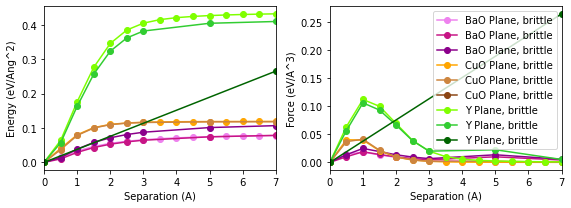

In [39]:
f3,ax3 = plt.subplots(1,2,sharex=True, figsize = [8,3])
ax3[0].plot(sep_scf, BaO_eng_scf, '-o',label = 'BaO Plane, brittle', color = 'violet')
ax3[0].plot(dsep_BaO, dBaO_eng, '-o',label = 'BaO Plane, brittle', color = 'mediumvioletred')
ax3[0].plot(Ca_sep_BaO, Ca_BaO_eng, '-o',label = 'BaO Plane, brittle', color = 'darkmagenta')

ax3[0].plot(sep_scf, CuO_eng_scf, '-o',label = 'CuO Plane, brittle', color = 'orange')
ax3[0].plot(dsep_CuO, dCuO_eng, '-o',label = 'CuO Plane, brittle', color = 'peru')
ax3[0].plot(Ca_sep_CuO, Ca_CuO_eng, '-o',label = 'CuO Plane, brittle', color = 'saddlebrown')

ax3[0].plot(sep_scf, Y_eng_scf, '-o',label = 'Y Plane, brittle', color = 'chartreuse')
ax3[0].plot(dsep_Y, dY_eng, '-o',label = 'Y Plane, brittle', color = 'limegreen')
ax3[0].plot(Ca_sep_Y, Ca_Y_eng, '-o',label = 'Y Plane, brittle', color = 'darkgreen')

ax3[1].plot(sep_scf, BaO_force_scf, 'o-',label = 'BaO Plane, brittle', color = 'violet')
ax3[1].plot(dsep_BaO, dBaO_force, 'o-',label = 'BaO Plane, brittle', color = 'mediumvioletred')
ax3[1].plot(Ca_sep_BaO, Ca_BaO_force, 'o-',label = 'BaO Plane, brittle', color = 'darkmagenta')

ax3[1].plot(sep_scf, CuO_force_scf, 'o-',label = 'CuO Plane, brittle', color = 'orange')
ax3[1].plot(dsep_CuO, dCuO_force, 'o-',label = 'CuO Plane, brittle', color = 'peru')
ax3[1].plot(Ca_sep_CuO, Ca_CuO_force, 'o-',label = 'CuO Plane, brittle', color = 'saddlebrown')

ax3[1].plot(sep_scf, Y_force_scf, 'o-',label = 'Y Plane, brittle', color = 'chartreuse')
ax3[1].plot(dsep_Y, dY_force, 'o-',label = 'Y Plane, brittle', color = 'limegreen')
ax3[1].plot(Ca_sep_Y, Ca_Y_force, 'o-',label = 'Y Plane, brittle', color = 'darkgreen')

ax3[1].set_xlabel('Separation (A)')
ax3[1].set_ylabel('Force (eV/A^3)')
ax3[0].set_ylabel('Energy (eV/Ang^2)')
ax3[0].set_xlabel('Separation (A)')
ax3[1].set_xlim([0,7])
ax3[1].legend()
f3.tight_layout()
f3.savefig('Doped v undoped.png')